# Visualising ECG signals
ECGprocess can generate canonical ECG images based on supplied tabular data. This is of course relevant for visualisation of individual ECGs but primarily devised to allow for image analysis on ECG data. 

In [1]:
# imports and test data
from ecgprocess.constants import ProcessDicomNames as PDNames
from ecgprocess.errors import NotCalledError
from ecgprocess.process_dicoms import (
    ECGDICOMReader,
)
import ecgprocess.plot_ecgs as plt_ecg
from ecgprocess.plot_ecgs import (
    ECGDrawing,
)
from ecgprocess.example_data.examples import (
    list_data_paths,
)
import matplotlib.pylab as plt

# test data
dicom_file_path = list_data_paths()['example_dicom_2']

## Canonical ECG image
Let's create a traditional ECG image using an ECGReader instance. 

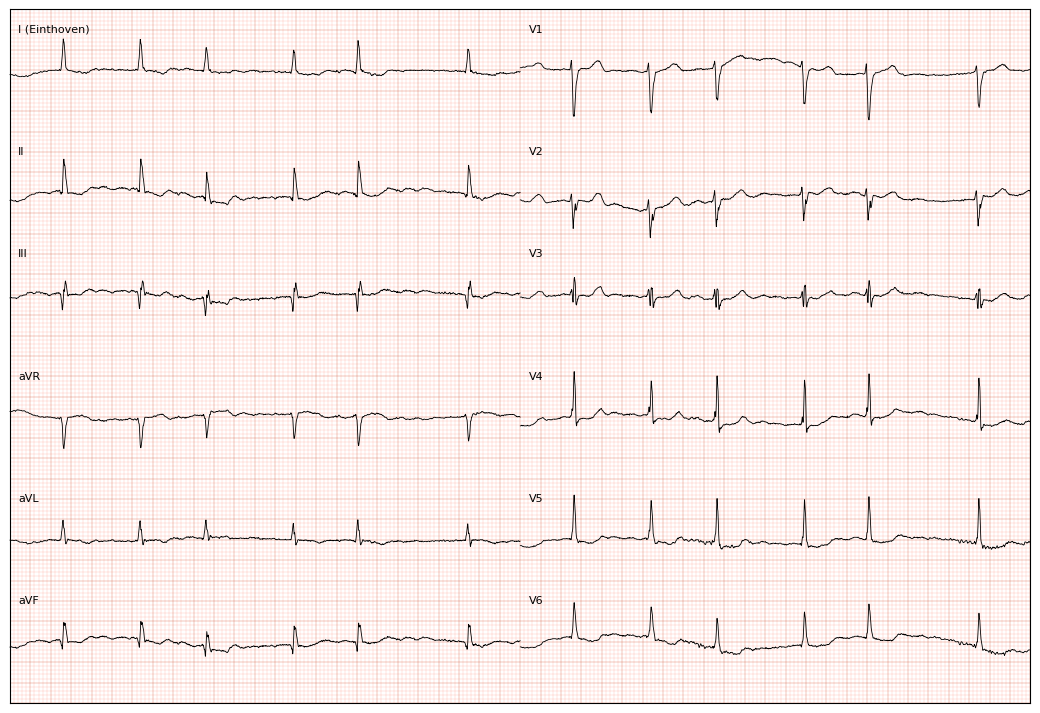

In [2]:
# process the tabular data
ecgdicomreader = ECGDICOMReader()
ecgreader=ecgdicomreader(path=dicom_file_path)

# how should the leads be presented
layout = [
    ['I (Einthoven)', 'V1'],
    ['II', 'V2'],
    ['III', 'V3'],
    ['aVR', 'V4'],
    ['aVL', 'V5'],
    ['aVF', 'V6'],
]
# draw 
artist = ECGDrawing()(ecgreader, add_grid=True, minor_axis=True, 
                     image_layout=layout)

## Map image to numpy array
We can map the matplotlib image to a 3 dimmensional numpy array, which of course can be used to re-plot the original image. 

In [3]:
arr=artist.to_numpy(crop=False)
arr.shape

(857, 1212, 4)

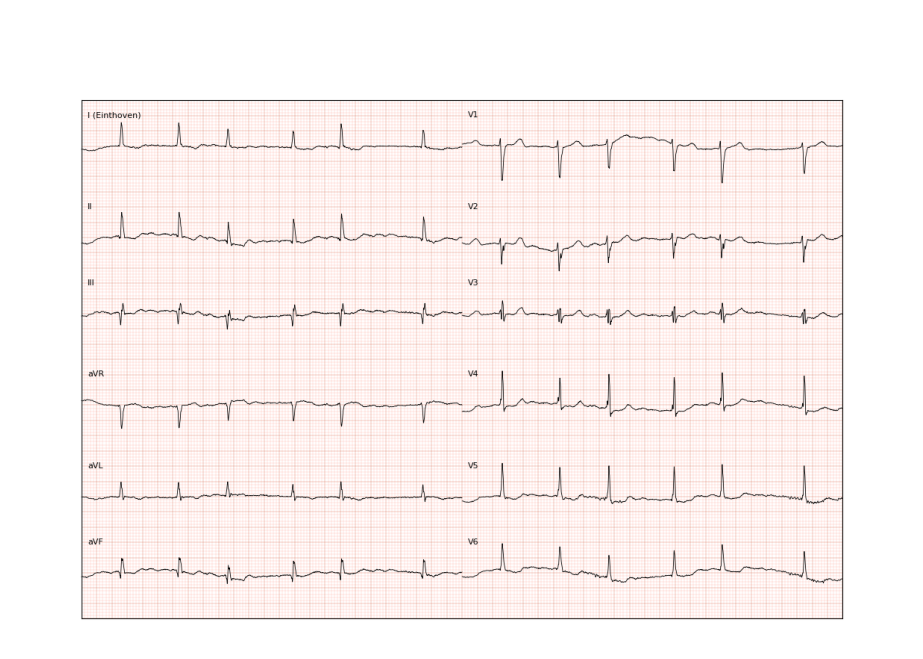

In [4]:
fig, ax = plt.subplots()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

# plot and re-size
ax.imshow(arr)
fig.set_size_inches(11.70, 8.30)


### Median beats
The median beats can be drawn as well.

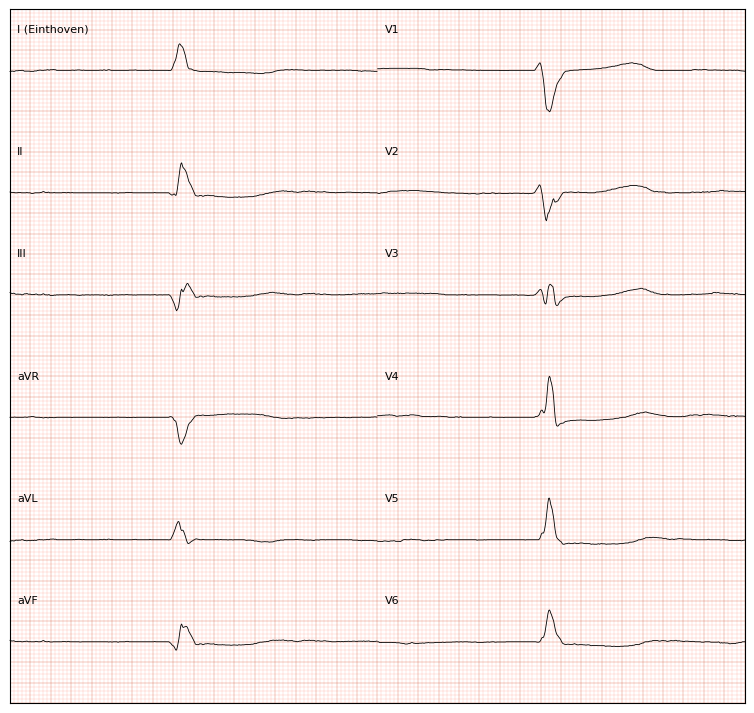

In [5]:
artist.width=180
artist.text_pad_x=10
artist = artist(ecgreader, add_grid=True, minor_axis=True, 
                     image_layout=layout, wave_type='median')

In [6]:
help(plt_ecg)

Help on module ecgprocess.plot_ecgs in ecgprocess:

NAME
    ecgprocess.plot_ecgs - Tools to plot ECG signals.

DESCRIPTION
    The primary aim is not to make nice ECG visuals but to create input data for
    image analysis.

    The code heavily borrows from the following brilliant github
    `repository <https://github.com/marcodebe/dicom-ecg-plot>`_.

CLASSES
    builtins.object
        ECGDrawing

    class ECGDrawing(builtins.object)
     |  ECGDrawing(update_keys: dict[str, str] | None = None) -> None
     |
     |  Takes a called `ECGDICOMReader` instance and plots the lead-specific
     |  ECG signals. Includes a method to map the figure to a 3-dimensional numpy
     |  array.
     |
     |  Attributes
     |  ----------
     |  mm_mv : `float`, default 10
     |      The scaling factor applied to the ECG signals, mapping these from
     |      1mm/mV to mm_vv * mm/mv.
     |  paper_w : `float`, default 297 mm
     |      The figure width.
     |  paper_h : `float`
     |      